# PCA

In [3]:
import pandas as pd
import numpy as np
import random as rd
from sklearn.decomposition import PCA
from sklearn import preprocessing
import matplotlib.pyplot as plt

In [4]:
genes = ['gene'+str(i) for i in range(1,101)]

In [5]:
wt = ['wt'+str(i) for i in range(1,6)]
ko = ['ko'+str(i) for i in range(1,6)]


In [6]:
data = pd.DataFrame(columns=[*wt, *ko], index=genes)

In [7]:
for gene in data.index:
    data.loc[gene, 'wt1':'wt5'] = np.random.poisson(lam=rd.randrange(10100), size=5)
    data.loc[gene, 'ko1':'ko5'] = np.random.poisson(lam=rd.randrange(10100), size=5)
    

In [8]:
data

,wt1,wt2,wt3,wt4,wt5,ko1,ko2,ko3,ko4,ko5
gene1,9309,9343,9523,9557,9615,5426,5566,5589,5669,5451
gene2,3238,3244,3365,3170,3234,8902,8927,8891,8920,8931
gene3,1550,1508,1596,1491,1553,6435,6487,6500,6456,6505
gene4,6831,6874,6957,6783,7034,1020,1015,1012,1072,1020
gene5,6166,6152,6121,6089,5984,8347,8249,8389,8413,8438
...,...,...,...,...,...,...,...,...,...,...
gene96,6839,6596,6565,6665,6566,810,819,808,812,794
gene97,178,156,164,154,172,6164,6267,6284,6317,6385
gene98,2034,2019,2013,2057,2031,1039,1041,1005,1009,1040
gene99,2457,2517,2470,2473,2477,2599,2531,2687,2547,2546


In [9]:
data.head()

,wt1,wt2,wt3,wt4,wt5,ko1,ko2,ko3,ko4,ko5
gene1,9309,9343,9523,9557,9615,5426,5566,5589,5669,5451
gene2,3238,3244,3365,3170,3234,8902,8927,8891,8920,8931
gene3,1550,1508,1596,1491,1553,6435,6487,6500,6456,6505
gene4,6831,6874,6957,6783,7034,1020,1015,1012,1072,1020
gene5,6166,6152,6121,6089,5984,8347,8249,8389,8413,8438


In [10]:
data.shape

(100, 10)

In [11]:
scaled_data = preprocessing.scale(data.T)

In [83]:
pca = PCA()

In [84]:
pca.fit(scaled_data)

PCA()

In [85]:
pca_data = pca.transform(scaled_data)

In [89]:
per_var = np.round(pca.explained_variance_ratio_*100, decimals=1)
labels = ['PC'+str(x) for x in range(1, len(per_var)+1)]

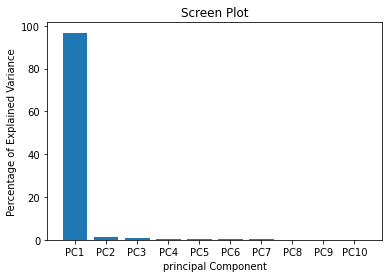

In [90]:
plt.bar(x=range(1,len(per_var)+1), height=per_var, tick_label=labels)
plt.ylabel("Percentage of Explained Variance")
plt.xlabel("principal Component")
plt.title("Screen Plot")
plt.show()

In [92]:
pca_df = pd.DataFrame(pca_data, index=[*wt, *ko], columns=labels)

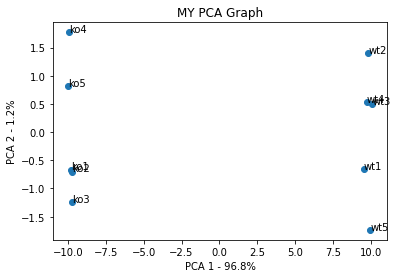

In [100]:
plt.scatter(pca_df.PC1, pca_df.PC2)
plt.title("MY PCA Graph")
plt.xlabel(f"PCA 1 - {per_var[0]}%")
plt.ylabel(f"PCA 2 - {per_var[1]}%")

for sample in pca_df.index:
    plt.annotate(sample, (pca_df.PC1.loc[sample], pca_df.PC2.loc[sample]))

plt.show()